<a href="https://colab.research.google.com/github/AngelTroncoso/Curso1_Prompt_IBM/blob/main/Curso1_Prompt_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Laboratorio Práctico: Proyecto Final: IA Generativa para Ciencia de Datos**

Esfuerzo Estimado: 60 mins  
Escenario del Proyecto

Has sido contratado como Científico de Datos por una firma de consultoría. La firma tiene un cliente que es un concesionario de autos usados. Tienen una característica especial en los autos Ford y quieren que tu firma diseñe un modelo que pueda predecir el precio óptimo de cotización para los autos en su lote. Te proporcionan datos de ventas de los últimos años. El conjunto de datos contiene diferentes características de los autos y el precio al que fueron vendidos.

##**Las tareas asignadas son las siguientes:**

- Puede haber algunas entradas duplicadas y algunos valores faltantes en el conjunto de datos. La limpieza de datos será parte de la tarea.  

- Debes realizar un análisis exploratorio de datos para obtener información detallada sobre los datos y determinar el efecto de diferentes características en el precio. Algunas solicitudes específicas del cliente incluyen:  
a. Identificar el número de ventas para cada tipo de combustible  
b. Identificar qué tipo de transmisión tiene más valores atípicos en el precio

- Comparar los modelos con regresiones lineales, polinómicas y de ridge en variables simples y múltiples para encontrar el modelo de mejor rendimiento

- Realizar una búsqueda en cuadrícula en el modelo de regresión de Ridge para identificar el hiperparámetro óptimo para el modelo para el mejor rendimiento.
Decides utilizar IA Generativa para crear códigos en Python que te ayuden a analizar los datos, determinar las mejores características y crear el modelo de predicción según los requisitos.

##**Acerca del Conjunto de Datos**

Este conjunto de datos contiene precios de venta de autos usados para autos Ford. Este es un conjunto de datos público disponible en el sitio web de Kaggle como Conjunto de Datos de Precios de Autos Ford bajo la licencia CC0: Dominio Público. El conjunto de datos ha sido ligeramente modificado para los propósitos de este proyecto.

**Los atributos de este conjunto de datos se explican a continuación:**  

Variable	Descripción :

model	Nombre del modelo del auto
year	Año de fabricación del auto  
transmission	Tipo de transmisión (Automática, Manual o Semi-Automática)  
mileage	Número de millas recorridas  
fuelType	El tipo de combustible que usa el auto (Gasolina, Diésel, Híbrido, Eléctrico, Otro)  
tax	Impuesto anual a pagar en USD  
mpg	Millas por Galón que recorre el auto  
engineSize	Tamaño del motor del auto  
price	Precio del auto en USD  

#**Entorno de ejecución del código**

**Leer un archivo de datos CSV y cargarlo en un marco de datos:**

Escribe un código en Python que pueda realizar las siguientes tareas:
Leer el archivo CSV, ubicado en una ruta de archivo dada, en un marco de datos de Pandas, asumiendo que las primeras filas del archivo son los encabezados de los datos.

In [54]:
# 1. Cargar el dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"
df = pd.read_csv(URL)

##**Limpieza de datos: Identificar y reemplazar valores faltantes según las siguientes pautas:**



**1. Reemplazar las entradas faltantes en columnas que contienen valores categóricos con las entradas más frecuentes.**  
**2. Reemplazar las entradas faltantes en columnas con datos continuos con el valor medio de la columna.**  
**3. Si falta un valor en la columna objetivo, es posible que necesites eliminar esa fila.**  

Escribe un código en Python para realizar las siguientes tareas:
1. Identificar los atributos con valores faltantes.
2. Segregar estos atributos en atributos categóricos y atributos de valor continuo.
3. Eliminar toda la fila si falta el valor en la variable objetivo.
4. Si falta el valor en un atributo categórico, reemplazar los valores faltantes con el valor más frecuente en la columna.
5. Si falta el valor en un atributo de valor continuo, reemplazar los valores faltantes con el valor medio de las entradas en la columna.

In [55]:
df.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize', 'price'],
      dtype='object')

In [114]:
df = df.rename(columns={
    'model': 'modelo',
    'year': 'año',
    'transmission': 'transmisión',
    'mileage': 'millas',
    'fuelType': 'tipo_de_combustible',
    'tax': 'impuesto',
    'mpg': 'millas_por_galón',
    'engineSize': 'tamaño_del_motor',
    'price': 'precio'
})

In [117]:
import pandas as pd
import numpy as np

# Suponiendo que df es tu DataFrame y 'price' es la variable objetivo
df = pd.DataFrame({
    'modelo': ['A', 'B', np.nan, 'A', 'B'],
    'año': [2010, 2015, 2020, np.nan, 2012],
    'transmisión': ['manual', np.nan, 'automática', 'manual', 'automática'],
    'millas': [50000, 30000, np.nan, 70000, 40000],
    'tipo_de_combustible': ['gasolina', 'diesel', 'gasolina', np.nan, 'diesel'],
    'impuesto': [100, 150, 120, 110, np.nan],
    'millas_por_galón': [30, np.nan, 25, 35, 28],
    'tamaño_del_motor': [1.6, 2.0, 1.8, np.nan, 1.7],
    'precio': [10000, 15000, np.nan, 12000, 11000]
})

variable_objetivo = 'precio'

# Identificar atributos con valores faltantes
atributos_con_valores_faltantes = df.columns[df.isnull().any()].tolist()
print("Atributos con valores faltantes:", atributos_con_valores_faltantes)

# Segregar atributos en categóricos y continuos
atributos_categoricos = df.select_dtypes(include=['object']).columns.intersection(atributos_con_valores_faltantes).tolist()
atributos_continuos = df.select_dtypes(include=['int64', 'float64']).columns.intersection(atributos_con_valores_faltantes).tolist()
print("Atributos categóricos con valores faltantes:", atributos_categoricos)
print("Atributos continuos con valores faltantes:", atributos_continuos)

# Eliminar filas con valores faltantes en la variable objetivo
df = df.dropna(subset=[variable_objetivo]).copy()  # Utilizar .copy() para evitar el warning

# Reemplazar valores faltantes en atributos categóricos con el valor más frecuente
for atributo in atributos_categoricos:
    modo = str(df[atributo].mode().iloc[0])  # Convertir el modo a cadena
    df.loc[:, atributo] = df[atributo].fillna(modo)

# Reemplazar valores faltantes en atributos continuos con el valor medio
for atributo in atributos_continuos:
    if atributo != variable_objetivo:
        df.loc[:, atributo] = df[atributo].fillna(df[atributo].mean())

print(df)


Atributos con valores faltantes: ['modelo', 'año', 'transmisión', 'millas', 'tipo_de_combustible', 'impuesto', 'millas_por_galón', 'tamaño_del_motor', 'precio']
Atributos categóricos con valores faltantes: ['modelo', 'transmisión', 'tipo_de_combustible']
Atributos continuos con valores faltantes: ['año', 'millas', 'impuesto', 'millas_por_galón', 'tamaño_del_motor', 'precio']
  modelo          año transmisión   millas tipo_de_combustible  impuesto  \
0      A  2010.000000      manual  50000.0            gasolina     100.0   
1      B  2015.000000      manual  30000.0              diesel     150.0   
3      A  2012.333333      manual  70000.0              diesel     110.0   
4      B  2012.000000  automática  40000.0              diesel     120.0   

   millas_por_galón  tamaño_del_motor   precio  
0              30.0          1.600000  10000.0  
1              31.0          2.000000  15000.0  
3              35.0          1.766667  12000.0  
4              28.0          1.700000  11000.

##**Normalización de datos: Normalizar un atributo a su valor máximo:**


Escribe un código en Python para normalizar el contenido bajo un atributo dado en un marco de datos df a su valor máximo. Realiza cambios en los datos originales y no crees un nuevo atributo.

In [118]:
def normalizar_a_maximo(df, atributo):
    maximo = df[atributo].max()
    if maximo != 0:  # Evitar división por cero
        df[atributo] = df[atributo] / maximo
    else:
        print("No se puede normalizar porque el valor máximo es cero.")

# Uso
atributo_a_normalizar = 'precio'  # Reemplaza con el nombre del atributo que deseas normalizar
normalizar_a_maximo(df, atributo_a_normalizar)


##**Conversión de variable categórica en variables indicadoras**



Escribe un código en Python para realizar las siguientes tareas:
1. Convertir un atributo de marco de datos df en variables indicadoras, guardadas como df1, con la convención de nombres “Nombre_<valor único del atributo>”.
2. Agregar df1 al marco de datos original df.
3. Eliminar el atributo original del marco de datos df.

In [120]:
import pandas as pd

def convertir_a_indicadoras(df, atributo):
    # Crear variables indicadoras
    df1 = pd.get_dummies(df[atributo], prefix=atributo, dtype=int)

    # Agregar df1 al marco de datos original df
    df = pd.concat([df, df1], axis=1)

    # Eliminar el atributo original del marco de datos df
    df = df.drop(atributo, axis=1)

    return df

# Uso
atributo_a_convertir = 'modelo'  # Reemplaza con el nombre del atributo que deseas convertir
df = convertir_a_indicadoras(df, atributo_a_convertir)


In [121]:
df.head()

,año,transmisión,millas,tipo_de_combustible,impuesto,millas_por_galón,tamaño_del_motor,precio,modelo_A,modelo_B
0,2010.000000,manual,50000.0,gasolina,100.0,30.0,1.600000,0.666667,1,0
1,2015.000000,manual,30000.0,diesel,150.0,31.0,2.000000,1.000000,0,1
3,2012.333333,manual,70000.0,diesel,110.0,35.0,1.766667,0.800000,1,0
4,2012.000000,automática,40000.0,diesel,120.0,28.0,1.700000,0.733333,0,1


#**Prompts importantes para generar insights de datos y visualizaciones**

##**Generar una descripción estadística de los datos:**  
Escribe un código en Python para generar la descripción estadística de todas las características utilizadas en el conjunto de datos. Incluye los tipos de datos “object” también.


In [122]:
import pandas as pd

def descripcion_estadistica(df):
    # Descripción estadística para características numéricas
    descripcion_numerica = df.describe()

    # Descripción estadística para características categóricas
    descripcion_categorica = df.select_dtypes(include=['object']).describe()

    # Combinar descripciones
    print("Descripción estadística de características numéricas:")
    print(descripcion_numerica)
    print("\nDescripción estadística de características categóricas:")
    print(descripcion_categorica)

# Uso
descripcion_estadistica(df)


Descripción estadística de características numéricas:
               año        millas    impuesto  millas_por_galón  \
count     4.000000      4.000000    4.000000           4.00000   
mean   2012.333333  47500.000000  120.000000          31.00000   
std       2.054805  17078.251277   21.602469           2.94392   
min    2010.000000  30000.000000  100.000000          28.00000   
25%    2011.500000  37500.000000  107.500000          29.50000   
50%    2012.166667  45000.000000  115.000000          30.50000   
75%    2013.000000  55000.000000  127.500000          32.00000   
max    2015.000000  70000.000000  150.000000          35.00000   

       tamaño_del_motor    precio  modelo_A  modelo_B  
count          4.000000  4.000000   4.00000   4.00000  
mean           1.766667  0.800000   0.50000   0.50000  
std            0.169967  0.144016   0.57735   0.57735  
min            1.600000  0.666667   0.00000   0.00000  
25%            1.675000  0.716667   0.00000   0.00000  
50%            

##**Crear gráficos de regresión entre una variable objetivo y una variable fuente de valor continuo.**  
Escribe un código en Python para generar un gráfico de regresión entre una variable objetivo y una variable fuente de un marco de datos.

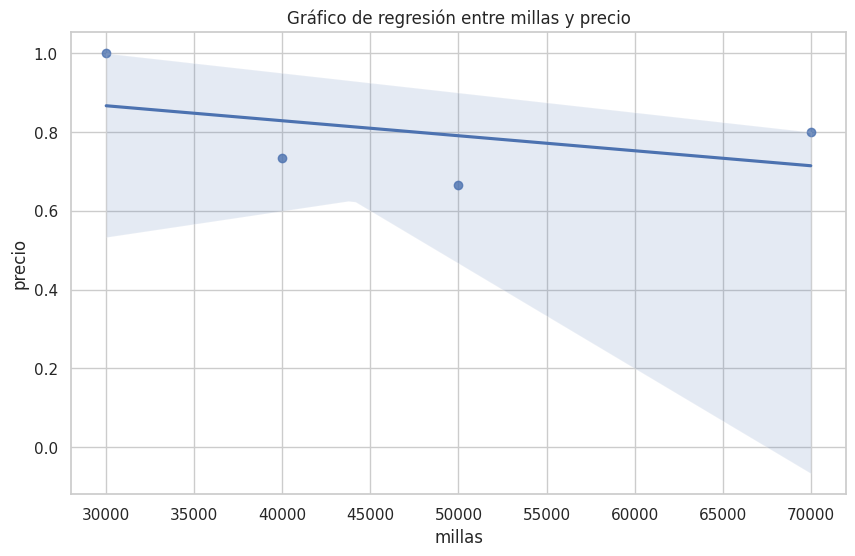

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

def grafico_regresion(df, variable_fuente, variable_objetivo):
    plt.figure(figsize=(10, 6))
    sns.regplot(x=variable_fuente, y=variable_objetivo, data=df)
    plt.title(f"Gráfico de regresión entre {variable_fuente} y {variable_objetivo}")
    plt.xlabel(variable_fuente)
    plt.ylabel(variable_objetivo)
    plt.show()

# Uso
variable_fuente = 'millas'  # Reemplaza con el nombre de la variable fuente
variable_objetivo = 'precio'  # Reemplaza con el nombre de la variable objetivo
grafico_regresion(df, variable_fuente, variable_objetivo)

##**Crear diagramas de caja entre una variable objetivo y una variable fuente categórica.**  
Escribe un código en Python para generar un diagrama de caja entre una variable objetivo y una variable fuente de un marco de datos.

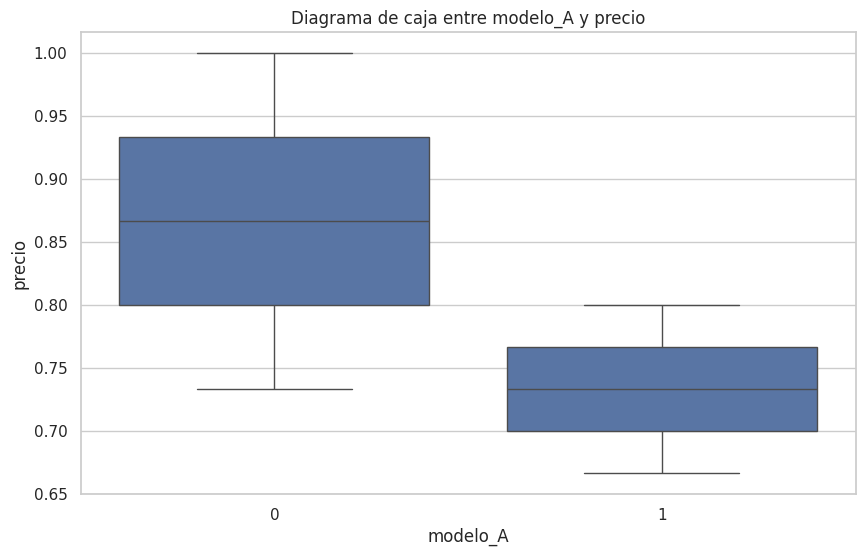

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

def diagrama_caja(df, variable_fuente, variable_objetivo):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=variable_fuente, y=variable_objetivo, data=df)
    plt.title(f"Diagrama de caja entre {variable_fuente} y {variable_objetivo}")
    plt.xlabel(variable_fuente)
    plt.ylabel(variable_objetivo)
    plt.show()

# Uso
variable_fuente = 'modelo_A'  # Reemplaza con el nombre de la variable fuente (categórica)
variable_objetivo = 'precio'  # Reemplaza con el nombre de la variable objetivo (numérica)
diagrama_caja(df, variable_fuente, variable_objetivo)


##**Evaluar la interdependencia paramétrica usando correlación, valor p y coeficiente de Pearson**  
Escribe un código en Python para evaluar la correlación, el coeficiente de Pearson y los valores p para todos los atributos de un marco de datos en relación con el atributo objetivo.

In [126]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

def evaluar_correlacion(df, atributo_objetivo):
    # Seleccionar atributos numéricos
    atributos_numericos = df.select_dtypes(include=['int64', 'float64']).columns

    # Eliminar el atributo objetivo de la lista de atributos
    atributos_numericos = [atributo for atributo in atributos_numericos if atributo != atributo_objetivo]

    # Evaluar correlación, coeficiente de Pearson y valores p
    resultados = []
    for atributo in atributos_numericos:
        correlacion, p_valor = pearsonr(df[atributo], df[atributo_objetivo])
        resultados.append({
            'Atributo': atributo,
            'Correlación': correlacion,
            'Valor p': p_valor
        })

    # Crear un DataFrame con los resultados
    df_resultados = pd.DataFrame(resultados)

    # Ordenar los resultados por correlación absoluta
    df_resultados = df_resultados.sort_values(by='Correlación', key=lambda x: x.abs(), ascending=False)

    return df_resultados

# Uso
atributo_objetivo = 'precio'  # Reemplaza con el nombre del atributo objetivo
df_resultados = evaluar_correlacion(df, atributo_objetivo)
print(df_resultados)


           Atributo  Correlación   Valor p
4  tamaño_del_motor     0.998625  0.001375
0               año     0.976221  0.023779
2          impuesto     0.928571  0.071429
6          modelo_B     0.534522  0.465478
5          modelo_A    -0.534522  0.465478
1            millas    -0.451754  0.548246
3  millas_por_galón     0.262071  0.737929


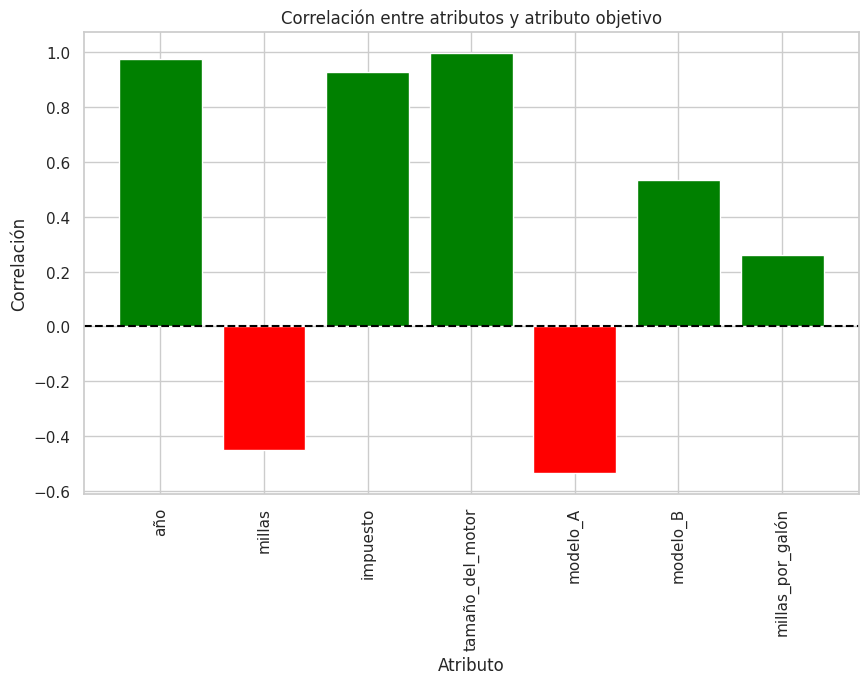

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Crea un DataFrame con los resultados
resultados = pd.DataFrame({
    'Atributo': ['año', 'millas', 'impuesto', 'tamaño_del_motor', 'modelo_A', 'modelo_B', 'millas_por_galón'],
    'Correlación': [0.976221, -0.451754, 0.928571, 0.998625, -0.534522, 0.534522, 0.262071]
})

# Plotea un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(resultados['Atributo'], resultados['Correlación'], color=['green' if x > 0 else 'red' for x in resultados['Correlación']])
plt.title('Correlación entre atributos y atributo objetivo')
plt.xlabel('Atributo')
plt.ylabel('Correlación')
plt.xticks(rotation=90)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

##**Agrupar variables para crear tablas dinámicas. Crear un gráfico p-color para la tabla dinámica.**  
Escribe un código en Python que realice las siguientes acciones:
1. Agrupa tres atributos como están disponibles en un marco de datos df.
2. Crea una tabla dinámica para este grupo, utilizando un atributo objetivo y una función de agregación como media.
3. Plotea un gráfico pcolor para esta tabla dinámica.

<ipython-input-133-50283fc9c271>:12: FutureWarning: The provided callable <function mean at 0x7d41641d1da0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tabla_dinamica = pd.pivot_table(df, values=atributo_objetivo, index=atributo1, columns=atributo2, aggfunc=np.mean)


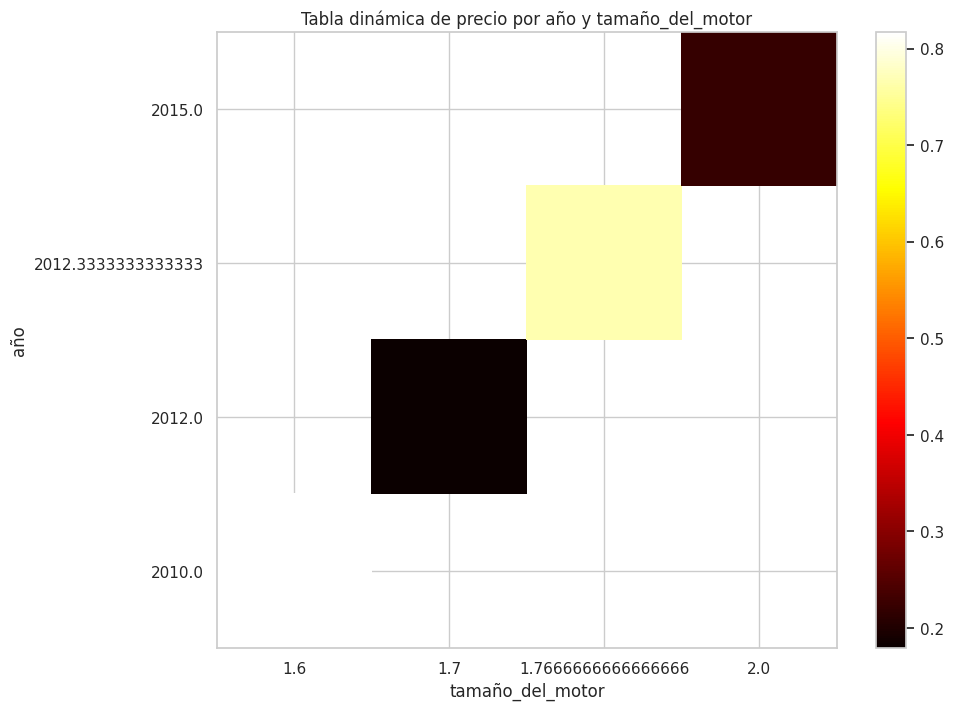

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suponiendo que df es tu DataFrame
atributo1 = 'año'
atributo2 = 'tamaño_del_motor'
atributo_objetivo = 'precio'
df[atributo_objetivo] = np.random.rand(len(df))  # Agrega esta línea si no tienes una columna 'precio'

# Agrupa dos atributos y crea una tabla dinámica
tabla_dinamica = pd.pivot_table(df, values=atributo_objetivo, index=atributo1, columns=atributo2, aggfunc=np.mean)

# Plotea un gráfico pcolor para la tabla dinámica
plt.figure(figsize=(10, 8))
plt.pcolor(tabla_dinamica, cmap='hot')
plt.title(f"Tabla dinámica de {atributo_objetivo} por {atributo1} y {atributo2}")
plt.xlabel(atributo2)
plt.ylabel(atributo1)
plt.xticks(np.arange(len(tabla_dinamica.columns)) + 0.5, tabla_dinamica.columns)
plt.yticks(np.arange(len(tabla_dinamica.index)) + 0.5, tabla_dinamica.index)
plt.colorbar()
plt.show()

#**Prompts importantes para el desarrollo y refinamiento del modelo**

##**Regresión lineal entre un atributo de origen único y un atributo objetivo y evalúalo**  
Escribe un código en Python que realice las siguientes tareas:
1. Desarrolle y entrene un modelo de regresión lineal que use un atributo de un marco de datos como variable de origen y otro como variable objetivo.
2. Calcule y muestre los valores de MSE y R^2 para el modelo entrenado.

In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Suponiendo que df es tu DataFrame
atributo_fuente = 'tamaño_del_motor'
atributo_objetivo = 'precio'

# Divide los datos en conjuntos de entrenamiento y prueba
X = df[[atributo_fuente]]
y = df[atributo_objetivo]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea y entrena un modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realiza predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcula y muestra los valores de MSE y R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")

# Puedes utilizar el modelo para realizar predicciones sobre nuevos datos
nuevo_dato = pd.DataFrame({atributo_fuente: [2000]})
prediccion = modelo.predict(nuevo_dato)
print(f"Predicción para {atributo_fuente} = 2000: {prediccion[0]:.2f}")

MSE: 0.01
R^2: nan
Predicción para tamaño_del_motor = 2000: -1570.03


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


##**Regresión lineal entre múltiples atributos de origen y atributos objetivo y evalúalo**  
Escribe un código en Python que realice las siguientes tareas:
1. Desarrolle y entrene un modelo de regresión lineal que use algunos atributos de un marco de datos como variables de origen y uno de los atributos como variable objetivo.
2. Calcule y muestre los valores de MSE y R^2 para el modelo entrenado.

In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Suponiendo que df es tu DataFrame
atributos_fuente = ['año', 'tamaño_del_motor', 'impuesto']
atributo_objetivo = 'precio'

# Divide los datos en conjuntos de entrenamiento y prueba
X = df[atributos_fuente]
y = df[atributo_objetivo]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea y entrena un modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realiza predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcula y muestra los valores de MSE y R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")

# Puedes utilizar el modelo para realizar predicciones sobre nuevos datos
nuevo_dato = pd.DataFrame({'año': [2020], 'tamaño_del_motor': [2000], 'impuesto': [150]})
prediccion = modelo.predict(nuevo_dato)
print(f"Predicción para año=2020, tamaño_del_motor=2000, impuesto=150: {prediccion[0]:.2f}")

# Coeficientes del modelo
print("Coeficientes del modelo:")
for atributo, coeficiente in zip(atributos_fuente, modelo.coef_):
    print(f"{atributo}: {coeficiente:.2f}")
print(f"Intercepto: {modelo.intercept_:.2f}")

MSE: 0.43
R^2: nan
Predicción para año=2020, tamaño_del_motor=2000, impuesto=150: 4526.46
Coeficientes del modelo:
año: 0.00
tamaño_del_motor: 2.27
impuesto: -0.04
Intercepto: -4.01


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


##**Modelo de regresión polinómica con una variable de origen y una variable objetivo**  
Escribe un código en Python que realice las siguientes tareas:
1. Desarrolle y entrene múltiples modelos de regresión polinómica, con órdenes 2, 3 y 5, que usen un atributo de un marco de datos como variable de origen y otro como variable objetivo.  
2. Calcule y muestre los valores de MSE y R^2 para los modelos entrenados.  
3. Compare el rendimiento de los modelos.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Orden 2:
MSE: 80.62
R^2: nan

Orden 3:
MSE: 96.93
R^2: nan

Orden 5:
MSE: 142.62
R^2: nan

El mejor modelo es el de orden 2 con un MSE de 80.62


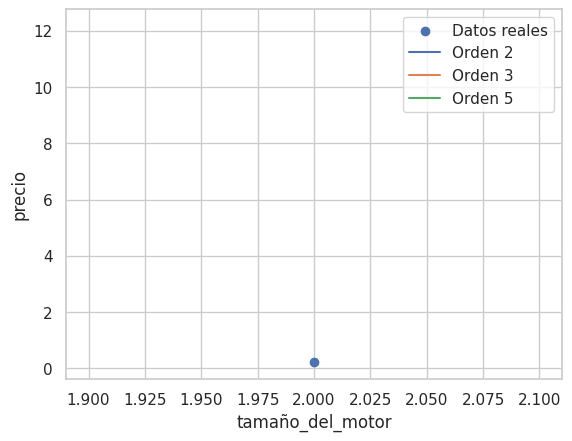

In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que df es tu DataFrame
atributo_fuente = 'tamaño_del_motor'
atributo_objetivo = 'precio'

# Divide los datos en conjuntos de entrenamiento y prueba
X = df[[atributo_fuente]]
y = df[atributo_objetivo]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrena modelos de regresión polinómica con diferentes órdenes
ordenes = [2, 3, 5]
modelos = {}

for orden in ordenes:
    poly_features = PolynomialFeatures(degree=orden)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    modelo = LinearRegression()
    modelo.fit(X_train_poly, y_train)
    y_pred = modelo.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    modelos[orden] = {'modelo': modelo, 'mse': mse, 'r2': r2}

# Muestra los valores de MSE y R^2 para los modelos entrenados
for orden, modelo in modelos.items():
    print(f"Orden {orden}:")
    print(f"MSE: {modelo['mse']:.2f}")
    print(f"R^2: {modelo['r2']:.2f}")
    print()

# Compara el rendimiento de los modelos
mejor_modelo = min(modelos, key=lambda x: modelos[x]['mse'])
print(f"El mejor modelo es el de orden {mejor_modelo} con un MSE de {modelos[mejor_modelo]['mse']:.2f}")

# Visualiza los modelos
plt.scatter(X_test, y_test, label='Datos reales')
for orden, modelo in modelos.items():
    poly_features = PolynomialFeatures(degree=orden)
    X_test_poly = poly_features.fit_transform(X_test)
    y_pred = modelo['modelo'].predict(X_test_poly)
    plt.plot(X_test, y_pred, label=f"Orden {orden}")
plt.xlabel(atributo_fuente)
plt.ylabel(atributo_objetivo)
plt.legend()
plt.show()

##**Creación de pipeline para escalado, creación de características polinómicas y regresión lineal**  
Escribe un código en Python que realice las siguientes tareas:
1. Crea un pipeline que realice escalado de parámetros, generación de características polinómicas y regresión lineal. Usa el conjunto de múltiples características como antes para crear este pipeline.  
2. Calcula y muestra los valores de MSE y R^2 para el modelo entrenado.

In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Suponiendo que df es tu DataFrame
atributos_fuente = ['año', 'tamaño_del_motor', 'impuesto']
atributo_objetivo = 'precio'

# Divide los datos en conjuntos de entrenamiento y prueba
X = df[atributos_fuente]
y = df[atributo_objetivo]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un pipeline que realice escalado de parámetros, generación de características polinómicas y regresión lineal
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

# Entrena el pipeline
pipeline.fit(X_train, y_train)

# Realiza predicciones sobre el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Calcula y muestra los valores de MSE y R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")

# Puedes utilizar el pipeline para realizar predicciones sobre nuevos datos
nuevo_dato = pd.DataFrame({'año': [2020], 'tamaño_del_motor': [2000], 'impuesto': [150]})
prediccion = pipeline.predict(nuevo_dato)
print(f"Predicción para año=2020, tamaño_del_motor=2000, impuesto=150: {prediccion[0]:.2f}")

MSE: 1.83
R^2: nan
Predicción para año=2020, tamaño_del_motor=2000, impuesto=150: 92231635.19


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


##**Búsqueda en cuadrícula con regresión ridge y validación cruzada**  
Escribe un código en Python que realice las siguientes tareas:
1. Usa características polinómicas para algunos de los atributos de un marco de datos.  
2. Realiza una búsqueda en cuadrícula en un modelo de regresión ridge para un conjunto de valores del hiperparámetro alpha y características polinómicas como entrada.  
3. Usa validación cruzada en la búsqueda en cuadrícula.  
4. Evalúa los valores de MSE y R^2 del modelo resultante.  

In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Suponiendo que df es tu DataFrame
atributos_fuente = ['año', 'tamaño_del_motor', 'impuesto']
atributo_objetivo = 'precio'

# Divide los datos en conjuntos de entrenamiento y prueba
X = df[atributos_fuente]
y = df[atributo_objetivo]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un pipeline que realice características polinómicas y regresión ridge
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('ridge_regression', Ridge())
])

# Define los hiperparámetros a buscar
param_grid = {
    'poly_features__degree': [1, 2, 3],
    'ridge_regression__alpha': [0.1, 1, 10]
}

# Realiza la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=min(5, len(X_train)), scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)  # Ajusta el objeto GridSearchCV

# Muestra los mejores hiperparámetros
print("Mejores hiperparámetros:")
print(grid_search.best_params_)

# Evalúa los valores de MSE y R^2 del modelo resultante
y_pred = grid_search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")

# Puedes utilizar el modelo para realizar predicciones sobre nuevos datos
nuevo_dato = pd.DataFrame({'año': [2020], 'tamaño_del_motor': [2000], 'impuesto': [150]})
prediccion = grid_search.best_estimator_.predict(nuevo_dato)
print(f"Predicción para año=2020, tamaño_del_motor=2000, impuesto=150: {prediccion[0]:.2f}")

Mejores hiperparámetros:
{'poly_features__degree': 1, 'ridge_regression__alpha': 10}
MSE: 0.73
R^2: nan
Predicción para año=2020, tamaño_del_motor=2000, impuesto=150: 2.92


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=9.85404e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=3.39946e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
